<a href="https://colab.research.google.com/github/EricoCoutoJr/OASAS/blob/master/categorical_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OASAS e Codificadores de Variáveis Categóricas
---
### Este script tem o objetivo de estimar o número de pacientes que poderão entrar no programa de tratamento de dependentes químicos no anos anos seguintes. Será usado apenas o módulo **Random Forest Regressor** para produzir o modelo. Mas serão testados 3 módulos diferentes para tratar variáveis **Catégóricas**:

**One Hot Encoder**

**Ordinal**

**Target Encoding**

Estas e outras funções podem ser encontradas em :
http://contrib.scikit-learn.org/category_encoders/




In [4]:
import pandas as pd
import numpy as np

### Este dataset foi importado do Kaggel para o estudo proposto.

In [89]:
# É necessário fazer o download do arquivo para a pasta raiz do Colab ou do Jupyter Lab
data = pd.read_csv("chemical-dependence-treatment-program-admissions-beginning-2007.csv")

In [7]:
data.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2018,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Alcohol,32
1,2018,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Heroin,60
2,2018,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Other Opioids,14
3,2018,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Cocaine incl Crack,1
4,2018,Albany,Crisis,Medical Managed Detoxification,18 thru 24,All Others,10


In [ ]:
data['Year'].value_counts().sort_index()

2007    6549
2008    6519
2009    6540
2010    6655
2011    6623
2012    6700
2013    6619
2014    6507
2015    6506
2016    6428
2017    6819
2018    6946
Name: Year, dtype: int64

In [9]:
# Dividindo os dados de treino e validação criando dois novos datasets
df_train = data[data['Year'] <= 2013]
df_val = data[data['Year'] > 2013]

In [10]:
# Inportando RandomForestRegressor do sklearn para fazer regreções masi a diante
from sklearn.ensemble import RandomForestRegressor

# One Hot Encoder
 Método usado para transformar variáveis Categóricas em Numéricas,
 criando um dataset com uma matrix de valores 0 e 1 para representar estas variáveis categóricas

In [12]:
# Para quem não tem esta biblioteca deve ser instalada da seguinte forma
!pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


In [13]:
# Importando o OneHotEncoder para transformar variáveis categóricas em numéricas
from category_encoders.one_hot import OneHotEncoder

# Definindo as variáveis categóricas que serão convertidas
enc = OneHotEncoder(cols=['County of Program Location', 'Program Category', 'Service Type', 'Age Group', 'Primary Substance Group'], use_cat_names=True)

# Aplicando no dataset de treino a definição criada na linha acima
enc.fit(df_train)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


OneHotEncoder(cols=['County of Program Location', 'Program Category',
                    'Service Type', 'Age Group', 'Primary Substance Group'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=0)

In [15]:
df_train.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
33206,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Alcohol,13
33207,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Heroin,186
33208,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Other Opioids,47
33209,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,All Others,7
33210,2013,Albany,Crisis,Medical Managed Detoxification,25 thru 34,Alcohol,132


In [16]:
# Neste momeento o data set apresenta uma variação de 61 estádos diferentes na coluna indicada
# Esta verificação poderá ser feita em todas as colunas
df_train['County of Program Location'].nunique()

61

In [17]:
# Aplicando o fit 'enc' em df_train e criando um novo dataset chamado 'df_train_ohe' com o formato definido
df_train_ohe = enc.transform(df_train)

In [18]:
df_train.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
33206,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Alcohol,13
33207,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Heroin,186
33208,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Other Opioids,47
33209,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,All Others,7
33210,2013,Albany,Crisis,Medical Managed Detoxification,25 thru 34,Alcohol,132


In [19]:
# Criou uma coluna para cada valor encontrado nas variáveis categóricas, matrizes de 0 e 1 para cada coluna da
# definida no fit'enc' tabela original.
df_train_ohe.head()

,Year,County of Program Location_Albany,County of Program Location_Allegany,County of Program Location_Bronx,County of Program Location_Broome,County of Program Location_Cattaraugus,County of Program Location_Cayuga,County of Program Location_Chautauqua,County of Program Location_Chemung,County of Program Location_Chenango,County of Program Location_Clinton,County of Program Location_Columbia,County of Program Location_Cortland,County of Program Location_Delaware,County of Program Location_Dutchess,County of Program Location_Erie,County of Program Location_Essex,County of Program Location_Franklin,County of Program Location_Fulton,County of Program Location_Genesee,County of Program Location_Greene,County of Program Location_Herkimer,County of Program Location_Jefferson,County of Program Location_Kings,County of Program Location_Lewis,County of Program Location_Livingston,County of Program Location_Madison,County of Program Location_Monroe,County of Program Location_Montgomery,County of Program Location_Nassau,County of Program Location_New York,County of Program Location_Niagara,County of Program Location_Oneida,County of Program Location_Onondaga,County of Program Location_Ontario,County of Program Location_Orange,County of Program Location_Orleans,County of Program Location_Oswego,County of Program Location_Otsego,County of Program Location_Putnam,...,Program Category_Inpatient,Program Category_Opioid Treatment Program,Program Category_Outpatient,Program Category_Residential,Program Category_Specialized,Service Type_Medical Managed Detoxification,Service Type_Med Sup Withdrawal - Inpatient,Service Type_Inpatient Rehabilitation,Service Type_Opioid Outpatient Treatment,Service Type_Outpatient Clinic,Service Type_Outpatient Rehabilitation,Service Type_Residential Rehab for Youth,Service Type_Intensive Residential,Service Type_Community Residential,Service Type_Supportive Living,Service Type_Specialized Outpatient - TBI,Service Type_Limited Outpatient/KEEP,Service Type_MAOT-A-Residential,Service Type_Medically Monitored Withdrawal,Service Type_Med Sup Withdrawal - Outpatient,Service Type_OTP Intensive Residential,Service Type_Outpat Chem Depend for Youth,Service Type_Specialized Outpatient - Mobile,Service Type_Specialized Services OP Rehab,Service Type_Long Term Res CD/Youth,Service Type_Short Term Res CD/Youth,Service Type_Non-Med Sup Chem Depend OP,Age Group_18 thru 24,Age Group_25 thru 34,Age Group_35 thru 44,Age Group_45 thru 54,Age Group_55 and Older,Age Group_Under 18,Primary Substance Group_Alcohol,Primary Substance Group_Heroin,Primary Substance Group_Other Opioids,Primary Substance Group_All Others,Primary Substance Group_Marijuana incl Hashish,Primary Substance Group_Cocaine incl Crack,Admissions
33206,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,13
33207,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,186
33208,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,47
33209,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7
33210,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,132


In [20]:
# Efetua amesma ação feita com o dataset df_train
# usa o formato definito com fit 'enc'
df_val_ohe = enc.transform(df_val)

In [21]:
df_val_ohe.head()

,Year,County of Program Location_Albany,County of Program Location_Allegany,County of Program Location_Bronx,County of Program Location_Broome,County of Program Location_Cattaraugus,County of Program Location_Cayuga,County of Program Location_Chautauqua,County of Program Location_Chemung,County of Program Location_Chenango,County of Program Location_Clinton,County of Program Location_Columbia,County of Program Location_Cortland,County of Program Location_Delaware,County of Program Location_Dutchess,County of Program Location_Erie,County of Program Location_Essex,County of Program Location_Franklin,County of Program Location_Fulton,County of Program Location_Genesee,County of Program Location_Greene,County of Program Location_Herkimer,County of Program Location_Jefferson,County of Program Location_Kings,County of Program Location_Lewis,County of Program Location_Livingston,County of Program Location_Madison,County of Program Location_Monroe,County of Program Location_Montgomery,County of Program Location_Nassau,County of Program Location_New York,County of Program Location_Niagara,County of Program Location_Oneida,County of Program Location_Onondaga,County of Program Location_Ontario,County of Program Location_Orange,County of Program Location_Orleans,County of Program Location_Oswego,County of Program Location_Otsego,County of Program Location_Putnam,...,Program Category_Inpatient,Program Category_Opioid Treatment Program,Program Category_Outpatient,Program Category_Residential,Program Category_Specialized,Service Type_Medical Managed Detoxification,Service Type_Med Sup Withdrawal - Inpatient,Service Type_Inpatient Rehabilitation,Service Type_Opioid Outpatient Treatment,Service Type_Outpatient Clinic,Service Type_Outpatient Rehabilitation,Service Type_Residential Rehab for Youth,Service Type_Intensive Residential,Service Type_Community Residential,Service Type_Supportive Living,Service Type_Specialized Outpatient - TBI,Service Type_Limited Outpatient/KEEP,Service Type_MAOT-A-Residential,Service Type_Medically Monitored Withdrawal,Service Type_Med Sup Withdrawal - Outpatient,Service Type_OTP Intensive Residential,Service Type_Outpat Chem Depend for Youth,Service Type_Specialized Outpatient - Mobile,Service Type_Specialized Services OP Rehab,Service Type_Long Term Res CD/Youth,Service Type_Short Term Res CD/Youth,Service Type_Non-Med Sup Chem Depend OP,Age Group_18 thru 24,Age Group_25 thru 34,Age Group_35 thru 44,Age Group_45 thru 54,Age Group_55 and Older,Age Group_Under 18,Primary Substance Group_Alcohol,Primary Substance Group_Heroin,Primary Substance Group_Other Opioids,Primary Substance Group_All Others,Primary Substance Group_Marijuana incl Hashish,Primary Substance Group_Cocaine incl Crack,Admissions
0,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,32
1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,60
2,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,14
3,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,10


In [22]:
# retiramos dos datasets a coluna que serão usadas como Y
# criando um dataset para treino e validação sem a coluna "Admissions"
X_train = df_train_ohe.drop("Admissions", axis=1)
X_val = df_val_ohe.drop("Admissions", axis=1)

# criando os datasets de Y apenas com a coluna "Admissions", ou coluna Target
y_train = df_train_ohe["Admissions"]
y_val = df_val_ohe["Admissions"]

# y=fx 

In [23]:
X_train.head()

,Year,County of Program Location_Albany,County of Program Location_Allegany,County of Program Location_Bronx,County of Program Location_Broome,County of Program Location_Cattaraugus,County of Program Location_Cayuga,County of Program Location_Chautauqua,County of Program Location_Chemung,County of Program Location_Chenango,County of Program Location_Clinton,County of Program Location_Columbia,County of Program Location_Cortland,County of Program Location_Delaware,County of Program Location_Dutchess,County of Program Location_Erie,County of Program Location_Essex,County of Program Location_Franklin,County of Program Location_Fulton,County of Program Location_Genesee,County of Program Location_Greene,County of Program Location_Herkimer,County of Program Location_Jefferson,County of Program Location_Kings,County of Program Location_Lewis,County of Program Location_Livingston,County of Program Location_Madison,County of Program Location_Monroe,County of Program Location_Montgomery,County of Program Location_Nassau,County of Program Location_New York,County of Program Location_Niagara,County of Program Location_Oneida,County of Program Location_Onondaga,County of Program Location_Ontario,County of Program Location_Orange,County of Program Location_Orleans,County of Program Location_Oswego,County of Program Location_Otsego,County of Program Location_Putnam,...,Program Category_Crisis,Program Category_Inpatient,Program Category_Opioid Treatment Program,Program Category_Outpatient,Program Category_Residential,Program Category_Specialized,Service Type_Medical Managed Detoxification,Service Type_Med Sup Withdrawal - Inpatient,Service Type_Inpatient Rehabilitation,Service Type_Opioid Outpatient Treatment,Service Type_Outpatient Clinic,Service Type_Outpatient Rehabilitation,Service Type_Residential Rehab for Youth,Service Type_Intensive Residential,Service Type_Community Residential,Service Type_Supportive Living,Service Type_Specialized Outpatient - TBI,Service Type_Limited Outpatient/KEEP,Service Type_MAOT-A-Residential,Service Type_Medically Monitored Withdrawal,Service Type_Med Sup Withdrawal - Outpatient,Service Type_OTP Intensive Residential,Service Type_Outpat Chem Depend for Youth,Service Type_Specialized Outpatient - Mobile,Service Type_Specialized Services OP Rehab,Service Type_Long Term Res CD/Youth,Service Type_Short Term Res CD/Youth,Service Type_Non-Med Sup Chem Depend OP,Age Group_18 thru 24,Age Group_25 thru 34,Age Group_35 thru 44,Age Group_45 thru 54,Age Group_55 and Older,Age Group_Under 18,Primary Substance Group_Alcohol,Primary Substance Group_Heroin,Primary Substance Group_Other Opioids,Primary Substance Group_All Others,Primary Substance Group_Marijuana incl Hashish,Primary Substance Group_Cocaine incl Crack
33206,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
33207,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
33208,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
33209,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
33210,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [24]:
# Definindo como será aplicada a regreção
mdl = RandomForestRegressor(n_jobs=6, n_estimators=100, random_state=22)
# Aplicando os datasets para treino do modelo
mdl.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=6, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [25]:
# aplicando o dataset de treino para gerar um dataset p-ohe de previsão da coluna 'Adimissions'
p_ohe = mdl.predict(X_val)

In [30]:
# Aqui só verificando o dataset
len(p_ohe)

33206

In [54]:
# Usando o SKLearn para medir a taxa de acerto do modelo
# Aqui vamos calcular o Erro Médio entre dataset de validação (y_val) e o previsto pelo modelo (p_ohe) 
from sklearn.metrics import mean_absolute_error
erro_ohe = mean_absolute_error(y_val, p_ohe)
print("Taxa Média de Acerto: {}%".format(100 - round(erro_ohe, 2)))

Taxa Média de Acerto: 84.82%


# Ordinal
Neste método ele define um numero/valor para cada opção na variável categórica, dando um peso para cada uma delas

In [ ]:
# demostrando que continuaremos usando o mesmo dataset original para testar o novo encoder
df_train.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
33206,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Alcohol,13
33207,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Heroin,186
33208,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Other Opioids,47
33209,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,All Others,7
33210,2013,Albany,Crisis,Medical Managed Detoxification,25 thru 34,Alcohol,132


In [35]:
# Importando 'OrdinalEncoder'
from category_encoders.ordinal import OrdinalEncoder

# Definindo as Variáveis Categóricas que irão ser modificadas
enc = OrdinalEncoder(cols=['County of Program Location', 'Program Category', 'Service Type', 'Age Group', 'Primary Substance Group'])

# Aplicando no dataset de treino a definição criada na linha acima
# enc.fit(df_train)
# Criando novo dataset com as definições 'enc' aplicadas no dataset 'df_train'
# df_train_ord = enc.transform(df_train)
df_train_ord = enc.fit_transform(df_train)

In [36]:
df_train_ord.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
33206,2013,1,1,1,1,1,13
33207,2013,1,1,1,1,2,186
33208,2013,1,1,1,1,3,47
33209,2013,1,1,1,1,4,7
33210,2013,1,1,1,2,1,132


In [37]:
df_val_ord = enc.transform(df_val)

In [38]:
df_val_ord.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2018,1,1,1.0,1,1,32
1,2018,1,1,1.0,1,2,60
2,2018,1,1,1.0,1,3,14
3,2018,1,1,1.0,1,6,1
4,2018,1,1,1.0,1,4,10


In [39]:
# Assim como foi feito no encoder usado anteriormente, são criados novos datasets de treino e vaildação para modelagem
X_train = df_train_ord.drop("Admissions", axis=1)
X_val = df_val_ord.drop("Admissions", axis=1)

y_train = df_train_ord["Admissions"]
y_val = df_val_ord["Admissions"]

mdl = RandomForestRegressor(n_jobs=6, n_estimators=100, random_state=22)
mdl.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=6, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [41]:
# Usando o modelo para gerar um dataset de previsões
# Aqui dentro do mdl (model) tem a função matemática do modelo preditivo
p_ord = mdl.predict(X_val)

In [55]:
from sklearn.metrics import mean_absolute_error
erro_ord = mean_absolute_error(y_val, p_ord)
print("Taxa Média de Acerto: {}%".format(100 - round(erro_ord, 2)))

Taxa Média de Acerto: 78.49%


## Target Encoding

In [45]:
df_train.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
33206,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Alcohol,13
33207,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Heroin,186
33208,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,Other Opioids,47
33209,2013,Albany,Crisis,Medical Managed Detoxification,18 thru 24,All Others,7
33210,2013,Albany,Crisis,Medical Managed Detoxification,25 thru 34,Alcohol,132


In [46]:
from category_encoders.target_encoder import TargetEncoder
enc = TargetEncoder(cols=['County of Program Location', 'Program Category', 'Service Type', 'Age Group', 'Primary Substance Group'],
                   min_samples_leaf=400)
enc.fit(df_train, df_train['Admissions'])
df_train_trg = enc.transform(df_train)

In [47]:
df_train_trg.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
33206,2013,35.887704,68.736003,99.255446,32.816565,96.876022,13
33207,2013,35.887704,68.736003,99.255446,32.816565,49.108832,186
33208,2013,35.887704,68.736003,99.255446,32.816565,15.765966,47
33209,2013,35.887704,68.736003,99.255446,32.816565,8.872935,7
33210,2013,35.887704,68.736003,99.255446,50.308285,96.876022,132


In [48]:
df_val_trg = enc.transform(df_val)

In [49]:
X_train = df_train_trg.drop("Admissions", axis=1)
X_val = df_val_trg.drop("Admissions", axis=1)

y_train = df_train_trg["Admissions"]
y_val = df_val_trg["Admissions"]

mdl = RandomForestRegressor(n_jobs=6, n_estimators=100, random_state=22)
mdl.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=6, oob_score=False,
                      random_state=22, verbose=0, warm_start=False)

In [50]:
p_trg = mdl.predict(X_val)

In [56]:
from sklearn.metrics import mean_absolute_error
erro_trg = mean_absolute_error(y_val, p_trg)
print("Taxa Média de Acerto: {}%".format(100 - round(erro_trg, 2)))

Taxa Média de Acerto: 84.15%


One Hot Encoder apresentou ligeiramente melhor performace quo o Target Encoding
e performace consideravelmente melhor o Ordinal



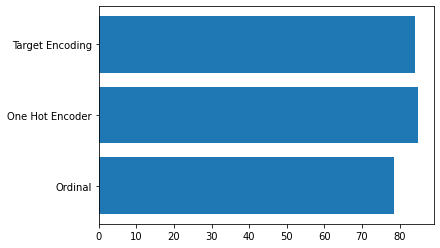

In [87]:
import matplotlib.pyplot as plt


_ = plt.barh(['Ordinal','One Hot Encoder','Target Encoding'], width=[100-erro_ord, 100-erro_ohe, 100-erro_trg])

print('One Hot Encoder apresentou ligeiramente melhor performace quo o Target Encoding')
print('e performace consideravelmente melhor o Ordinal\n')

### O gráfico acima demostra o efeito dos diferentes encoders sobre a acurácia de um unico modelo, indicando a necessidade do tratamento de variáveis **categóricas** para uma melhor performace do modelo.
